In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
import scipy
import operator
import difflib
from IPython.core.display import display,HTML
try:
    import cPickle as pickle     #it is faster than pickle!
except:
    import pickle
    
import unicodedata
import networkx as nx
import itertools
import seaborn as sns   ### https://seaborn.pydata.org/tutorial/categorical.html
    
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser


import plotly.plotly as py
from plotly.graph_objs import *


import plotly.tools as tls
tls.set_credentials_file(username='juliettapc', api_key='S3F0wIl4ix9z4GplKfx7')  # my plotly account credentials



In [ ]:
# ns: The hashed shared folder identifier 
# members: The total number of shared folder members as of '2015-05-15' 
# _c2: The creation date of the shared folder
# _c3: The date when the file was last changed
# member_id: The hashed user identifier. I was able to get approval to share all members of shared folders who are affiliated with a university. 
# member_email: The email domain associated with each member. I was able to get approval to share the domain of each shared folder member :) This way, we not only know how many 
     #     WOS members are shared on each folder, but how many university affiliates are shared, and (because we have total membership) how many "other" members are shared on the folder. 
# added: The number of files each member added to the shared folder from '2015-05-19' to '2017-05-15'. This is the time frame for which we have data for. 
# edited: The number of files each member edited in the shared folder from '2015-05-19' to '2017-05-15'.
# deleted: The number of files each member deleted from the shared folder from '2015-05-19' to '2017-05-15'.
# major_content_type: The major content type in the shared folder. 
# major_file_ext: The major file extension in the shared folder. 


In [2]:
list_names = ['folder_id', 'num_folder_members', 'folder_creation_date','date_last_change','user_id', 'email_domain', 'num_adds', 'num_edits', 'num_deletes', 'major_content_type' ,'major_content_ext','group_total_publ','group_num_papers_last','group_num_citations']

#original columns:    ns	members	_c2	_c3	member_id	member_email	added	edited	deleted	major_content_type	major_file_ext	new_group_total_pubs	new_group_num_papers_last	new_group_num_citations

path="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Dropbox/"
input_file='Dropbox_datafile_may22_2017.csv'
df=pd.read_csv(path+input_file, sep=',',na_values=["NAN","-1","null"],header=0,names = list_names,low_memory=False, parse_dates=['folder_creation_date','date_last_change']) # set header=0 if i wanna pass it my own list of header names
print df.shape
df.head()

(2592500, 14)


,folder_id,num_folder_members,folder_creation_date,date_last_change,user_id,email_domain,num_adds,num_edits,num_deletes,major_content_type,major_content_ext,group_total_publ,group_num_papers_last,group_num_citations
0,592732,4,2008-06-12,2012-12-25,77422,cornell.edu,NaN,NaN,NaN,office_docs,doc,NaN,NaN,NaN
1,592732,4,2008-06-12,2012-12-25,79630,cornell.edu,NaN,NaN,NaN,office_docs,doc,NaN,NaN,NaN
2,592732,4,2008-06-12,2012-12-25,77619,cornell.edu,80.0,72.0,0.0,office_docs,doc,NaN,NaN,NaN
3,604794,2,2008-06-27,2012-12-23,86572,unc.edu,21798.0,40498.0,10660.0,pdf,pdf,NaN,NaN,NaN
4,680152,2,2008-08-26,2013-01-04,76579,cs.princeton.edu,644.0,0.0,112.0,pdf,pdf,NaN,NaN,NaN


In [3]:
df=df.drop_duplicates()
df.shape

(1427672, 14)

In [4]:
# for row in df[df.user_id == 76579].iterrows():
    
#     date_in=row[1].folder_creation_date
#     date_out=row[1].date_last_change
#     print len(df[df.user_id == 76579]), date_in, date_out, type(date_in), row[1].date_last_change-row[1].folder_creation_date, (row[1].date_last_change-row[1].folder_creation_date).days +1

In [5]:

# def convert_unicode_to_string(old_cadena):
    
    
#     try:
        
#         new_cadena=unicodedata.normalize('NFKD', old_cadena).encode('ascii','ignore')
# #         print old_cadena,type(old_cadena)
# #         print new_cadena,type(new_cadena)
# #         raw_input()
#         return new_cadena
#     except TypeError:  # if it is a string already
# #         print type(old_cadena)
# #         print old_cadena
# #         raw_input()
#         return old_cadena




# df_disamb_wos_test['lastname'] = df_disamb_wos_test.lastname.apply(convert_unicode_to_string)


# df_disamb_wos_test['folder_age'] = df_disamb_wos_test.apply(lambda row: row.University.replace(", ",",").replace("[","").replace("]","").split(","), axis=1)

df['folder_lifespan'] = df.apply(lambda row: (row.date_last_change - row.folder_creation_date).days +1 , axis=1)

df.head()

,folder_id,num_folder_members,folder_creation_date,date_last_change,user_id,email_domain,num_adds,num_edits,num_deletes,major_content_type,major_content_ext,group_total_publ,group_num_papers_last,group_num_citations,folder_lifespan
0,592732,4,2008-06-12,2012-12-25,77422,cornell.edu,NaN,NaN,NaN,office_docs,doc,NaN,NaN,NaN,1658
1,592732,4,2008-06-12,2012-12-25,79630,cornell.edu,NaN,NaN,NaN,office_docs,doc,NaN,NaN,NaN,1658
2,592732,4,2008-06-12,2012-12-25,77619,cornell.edu,80.0,72.0,0.0,office_docs,doc,NaN,NaN,NaN,1658
3,604794,2,2008-06-27,2012-12-23,86572,unc.edu,21798.0,40498.0,10660.0,pdf,pdf,NaN,NaN,NaN,1641
4,680152,2,2008-08-26,2013-01-04,76579,cs.princeton.edu,644.0,0.0,112.0,pdf,pdf,NaN,NaN,NaN,1593


In [ ]:
# - What does it mean when a Dropbox user has a member_id but has NaN values for added, edited, deleted? (i assume it doesn't mean he/she has: added=0, edited=0, deleted=0, right?). 
#Out of the 2M rows, approximately 1.7M have NaNs in those 3 columns. 
#     You are correct. The NaN values indicate no adds, edits, or deletes during the timeframe. In these cases, the user in question may have downloaded and edited the file(s) on his/her 
#own computer and decided not to re-upload to Dropbox. 


# - What does it mean when the value for members is smaller than the number of rows for a given ns? (i thought the number of members was always >= than the number of rows for a given ns, 
#because it also counts non-university collaborators?)
#    Typically, the member count will be >=the number of rows (please ignore duplicate rows that correspond to the same user and same namespace). An exception would transpire 
#if one or more previous member(s) of a folder has/have since left (the member count is a recent count). By way of example, 5 individuals may have joined a folder when it was first
#created and each would have a corresponding row. If 2 members leave the shared folder, the member count would be 3, but there would still be 5 associated rows. 

# - Regarding the column _c3 ("The date when the file was last changed"): does it mean the last date when any file in that folder was changed?
#    Yes, "changed" in terms of file adds, edits, and deletes (not necessarily views or downloads). 

                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        

In [6]:
new_datafile=input_file.replace(".csv","_no_duplicates_added_lifespan.csv")
df.to_csv(path+new_datafile, sep=',')
print "written:", path+new_datafile

written: /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Dropbox/Dropbox_datafile_may22_2017_no_duplicates_added_lifespan.csv


In [8]:
df.head(10).sort_values(by=["folder_id","user_id"])

,folder_id,num_folder_members,folder_creation_date,date_last_change,user_id,email_domain,num_adds,num_edits,num_deletes,major_content_type,major_content_ext,group_total_publ,group_num_papers_last,group_num_citations,folder_lifespan
0,592732,4,2008-06-12,2012-12-25,77422,cornell.edu,NaN,NaN,NaN,office_docs,doc,NaN,NaN,NaN,1658
2,592732,4,2008-06-12,2012-12-25,77619,cornell.edu,80.0,72.0,0.0,office_docs,doc,NaN,NaN,NaN,1658
1,592732,4,2008-06-12,2012-12-25,79630,cornell.edu,NaN,NaN,NaN,office_docs,doc,NaN,NaN,NaN,1658
3,604794,2,2008-06-27,2012-12-23,86572,unc.edu,21798.0,40498.0,10660.0,pdf,pdf,NaN,NaN,NaN,1641
4,680152,2,2008-08-26,2013-01-04,76579,cs.princeton.edu,644.0,0.0,112.0,pdf,pdf,NaN,NaN,NaN,1593
5,693982,2,2008-09-08,2012-12-25,140646,columbia.edu,812.0,560.0,56.0,office_docs,xls,1.0-2.0,0.0-1.0,1.0-30.0,1570
7,756104,11,2008-09-14,2013-01-09,205694,cs.cmu.edu,11480.0,0.0,0.0,photo,jpg,NaN,NaN,NaN,1579
8,756104,11,2008-09-14,2013-01-09,260790,cs.pitt.edu,NaN,NaN,NaN,photo,jpg,8.0-22.0,0.0-1.0,30.0-229.0,1579
6,756104,11,2008-09-14,2013-01-09,264014,cs.cmu.edu,NaN,NaN,NaN,photo,jpg,NaN,NaN,NaN,1579
9,788418,2,2008-09-18,2013-01-09,188676,cornell.edu,419.0,84.0,28.0,photo,jpg,NaN,NaN,NaN,1575


In [7]:
print "# unique folder_id",len(df.folder_id.unique())  #521274
print "# unique user_id",len(df.user_id.unique())  # 440353
print "# unique major content types",len(df.major_content_type.unique())  # 16
print "# unique major file ext",len(df.major_content_ext.unique())  # 204


# unique folder_id 521274
# unique user_id 440353
# unique major content types 16
# unique major file ext 204


In [8]:
df.groupby("major_content_type").size().sort_values()


major_content_type
ebook                251
camera_raw           496
executable          1518
design              8562
audio               9948
data_developer     11250
compressed         11274
developer          15425
data_work          16041
video              24827
other_docs         26492
image              39166
photo             102956
pdf               242521
office_docs       498536
dtype: int64

In [9]:
df.groupby("major_content_ext").size().sort_values()

major_content_ext
asp              1
hdb              1
fb2              1
ebk              1
srf              1
azw              1
tr               1
pef              1
bz               1
mrw              1
rm               2
hus              2
scss             2
dds              2
swift            2
orf              2
mo               2
scriv            2
3ds              2
wps              2
raf              2
thm              3
azw3             3
dwf              3
markdown         3
pct              4
pas              4
yml              4
snb              4
nrw              4
             ...  
rtf           2046
eps           2111
wav           2218
gz            2233
tiff          2312
jpeg          2317
m4a           2332
sav           2350
key           2533
ai            2747
r             3192
mp3           4316
m             4664
log           5230
csv           6298
mov           7771
zip           8638
txt          10326
mp4          10704
tex          12393
tif          

In [ ]:
df.columns

In [ ]:
df_complete_info=df[['folder_id','group_total_publ',  'num_edits' ]].dropna(how='any')  # by default, dropna drops a row if ANY  of the indicated fields are missing (i can also set it to if ALL the fields are missing: how='all')
print df_complete_info.shape




#'folder_id','folder_creation_date' ,'date_last_change','user_id' ,'email_domain'   1427672  (all rows)

#'folder_id','num_adds' ,'num_edits', 'num_deletes'    501103


# 'folder_id','group_total_publ' , 'group_num_papers_last','group_num_citations'  318989

# 'folder_id','group_total_publ',  'num_edits'     123330

In [ ]:
#df = df.rename(columns={'Shared folder number': 'folder_id', 'User responsible for action': 'user_id', 'Email domain associated with user responsible for action': 'email_domain', "Number of file adds from '2014-05-01' - '2017-05-01'": 'num_adds', "Number of file edits from '2014-05-01' - '2017-05-01'": 'num_edits', "Number of file deletes from '2014-05-01' - '2017-05-01'": 'num_deletes', 'Number of shared folder members': 'num_folder_members', 'Major content type': 'major_content_type' ,'Major file extension': 'major_content_ext', 'Age of shared folder': 'age_folder_days' })




In [ ]:

#df.sort_values(by='folder_id', axis=0, ascending=True)


#df.groupby("folder_id").size().sort_values()


In [ ]:

#### select all rows by conditions on multiple columns
df[df['num_edits'].isnull() & df['num_adds'].isnull()& df['num_deletes'].isnull()]

In [ ]:
df[(df.num_edits == 0.0) & (df.num_adds == 0.0)& (df.num_deletes == 0.0)]


In [11]:
df[df.major_content_type == "pdf"]


,folder_id,num_folder_members,folder_creation_date,date_last_change,user_id,email_domain,num_adds,num_edits,num_deletes,major_content_type,major_content_ext,group_total_publ,group_num_papers_last,group_num_citations,folder_lifespan
3,604794,2,2008-06-27,2012-12-23,86572,unc.edu,21798.0,40498.0,10660.0,pdf,pdf,NaN,NaN,NaN,1641
4,680152,2,2008-08-26,2013-01-04,76579,cs.princeton.edu,644.0,0.0,112.0,pdf,pdf,NaN,NaN,NaN,1593
10,798240,4,2008-09-19,2013-01-09,2101784,stanford.edu,84.0,112.0,28.0,pdf,pdf,1.0-2.0,0.0-1.0,0.0-1.0,1574
11,798240,4,2008-09-19,2013-01-09,26477840,stanford.edu,NaN,NaN,NaN,pdf,pdf,NaN,NaN,NaN,1574
12,798240,4,2008-09-19,2013-01-09,243435748,stanford.edu,NaN,NaN,NaN,pdf,pdf,NaN,NaN,NaN,1574
13,798240,4,2008-09-19,2013-01-09,11982445,stanford.edu,NaN,NaN,NaN,pdf,pdf,NaN,NaN,NaN,1574
14,798240,4,2008-09-19,2013-01-09,43611355,stanford.edu,NaN,NaN,NaN,pdf,pdf,NaN,NaN,NaN,1574
15,798240,4,2008-09-19,2013-01-09,237802,stanford.edu,NaN,NaN,NaN,pdf,pdf,NaN,NaN,NaN,1574
53,1066768,5,2008-12-04,2012-12-20,219839,easternct.edu,252.0,112.0,28.0,pdf,pdf,NaN,NaN,NaN,1478
54,1066768,5,2008-12-04,2012-12-20,703797,csulb.edu,NaN,NaN,NaN,pdf,pdf,NaN,NaN,NaN,1478


In [42]:

#print len(df[(df.major_content_type != df.major_content_ext) & (df.major_content_type == "developer")].major_content_ext.unique())



#df[(df.major_content_type != df.major_content_ext) & (df.major_content_type == "developer")].groupby("major_content_ext").size().sort_values()


df[(df.major_content_type  == "other_docs")].groupby("major_content_ext").size().sort_values()


major_content_ext
plist         1
mpg           1
zip           2
xlsm          2
wps           2
mov           2
m4v           2
icns          3
ai            3
bmp           4
tiff          4
scriv         4
sav           4
java          4
pdb           4
chm           5
prf           6
exe           6
fff           8
xls           9
ics          12
ps           18
doc          20
r            20
eps          31
jpg          34
csv          36
xlsx         36
pst          41
m            52
rtfd         66
docx         81
scrivx       89
txt          99
png         104
wpd         119
pptx        156
ods         166
one         205
odt         238
pub         368
gz          417
eml         583
pages      1448
aux        1471
log        2091
msg        2398
rtf        3554
key        3957
pdf        4745
tex       15977
dtype: int64

In [ ]:
# print "age folder in days"
# lista=list(df[["age_folder_days"]].values.flatten())  # this has repetitions (same folder multiple rows)
# sns.distplot(lista, kde=False, rug=True)

In [ ]:
df.columns

In [14]:
list_columns=['num_folder_members', 'folder_creation_date', 'date_last_change', 'num_adds','num_edits', 'num_deletes', 'major_content_type','group_total_publ', 'group_num_papers_last','group_num_citations', 'folder_lifespan']
for c in list_columns:
    try:
        print "\n",c,":\t\t\t", df[c].median()
    except: pass


num_folder_members :			4.0

folder_creation_date :			
date_last_change :			
num_adds :			252.0

num_edits :			56.0

num_deletes :			28.0

major_content_type :			
group_total_publ :			
group_num_papers_last :			
group_num_citations :			
folder_lifespan :			1.0


In [16]:


for tipo in df.major_content_type.unique():
    print tipo
    print df[df.major_content_type == tipo].mean(),"\n"
   

office_docs
folder_id             8.742424e+08
num_folder_members    1.133401e+01
user_id               1.678497e+08
num_adds              7.415762e+03
num_edits             4.174707e+03
num_deletes           3.564183e+03
folder_lifespan       1.670972e+02
dtype: float64 

pdf
folder_id             9.118085e+08
num_folder_members    1.697059e+01
user_id               1.690274e+08
num_adds              6.688257e+03
num_edits             6.141825e+03
num_deletes           3.500397e+03
folder_lifespan       1.426357e+02
dtype: float64 

photo
folder_id             8.801778e+08
num_folder_members    1.250310e+01
user_id               1.532157e+08
num_adds              1.054305e+04
num_edits             3.170556e+03
num_deletes           3.501619e+03
folder_lifespan       1.508062e+02
dtype: float64 

data_work
folder_id             9.030791e+08
num_folder_members    1.237061e+01
user_id               1.640410e+08
num_adds              7.401363e+04
num_edits             3.737012e+04
num_del

In [ ]:
for tipo in df.major_content_type.unique():
    print tipo,
    print "\t# records:",len(df.num_edits[df.major_content_type == tipo]),"\tnum edits:",df.num_edits[df.major_content_type == tipo].median(),
    print "  num adds:",df.num_adds[df.major_content_type == tipo].median(),
    print "  num deletes:",df.num_deletes[df.major_content_type == tipo].median(),"\n"

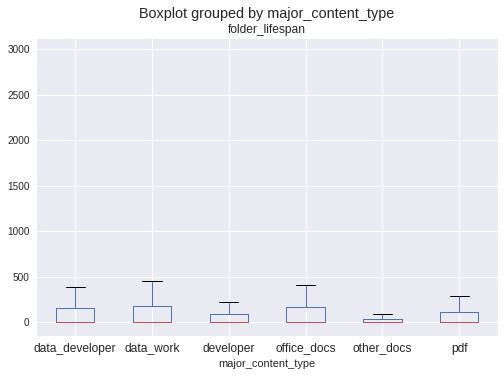

In [73]:
df_selection = df[(df.major_content_type == "office_docs") | (df.major_content_type == "other_docs")| (df.major_content_type == "pdf")| (df.major_content_type == "data_work")| (df.major_content_type == "developer")| (df.major_content_type == "data_developer")]





#sns.jointplot(x="num_adds", y="num_edits", data=df_selection, kind="kde");

df_selection.boxplot(column=["folder_lifespan"],by="major_content_type")
# df_selection = df[(df.major_content_type == "other_docs") | (df.major_content_type == "office_docs")]


# df_selection.boxplot(column="num_adds", by="major_content_type")

#sns.boxplot(data= df_selection[["num_edits","num_adds","num_deletes" ]])


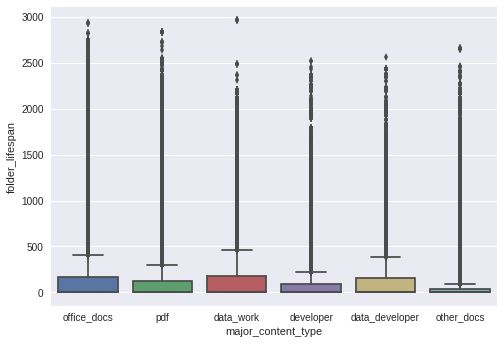

In [59]:
sns.boxplot(x="major_content_type", y="folder_lifespan",  data=df_selection)

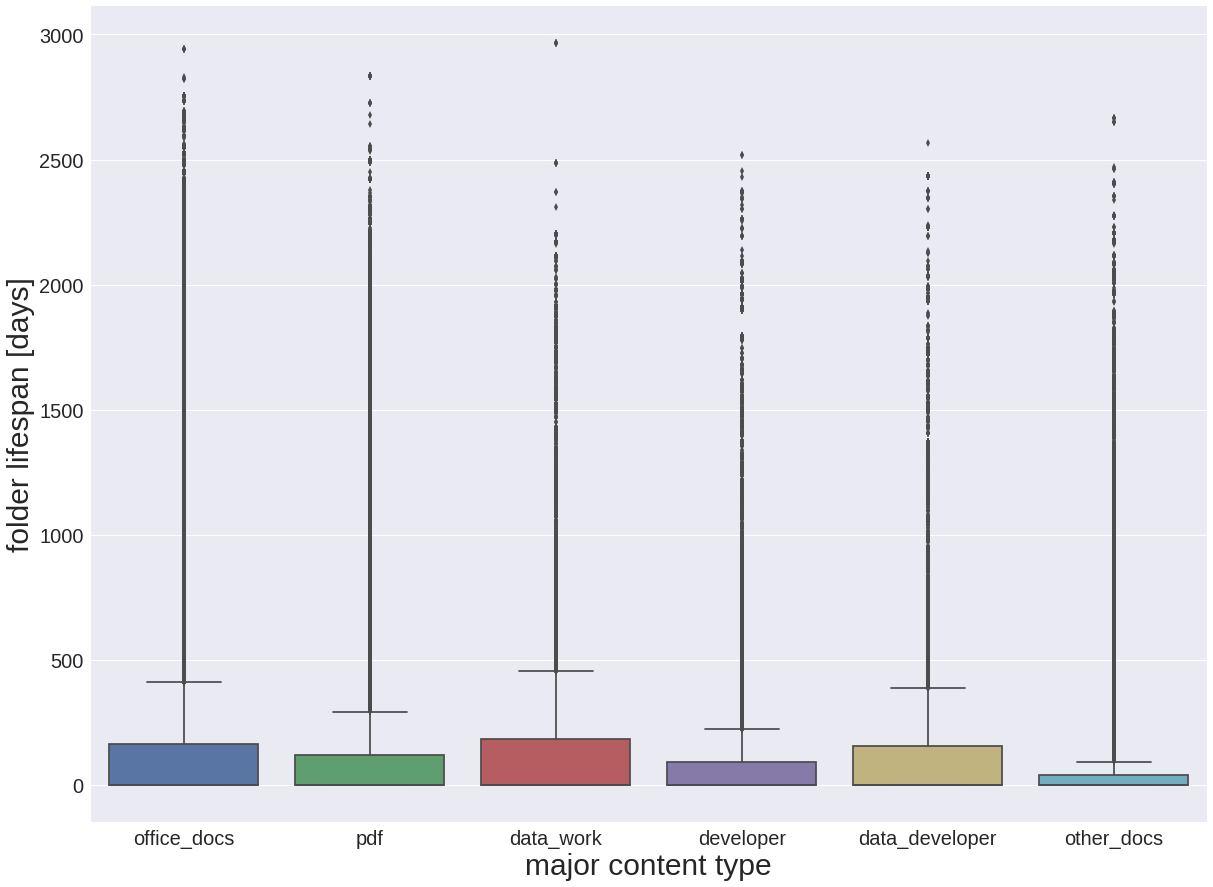

In [60]:
# sns.boxplot(x="major_content_type", y="age_folder_days",  data=df)
# #.set_ylabel("age folder [days]",fontsize=20).set_xlabel("major content type",fontsize=200)#, palette="PRGn")




b = sns.boxplot(x=df_selection["major_content_type"], y=df["folder_lifespan"])
#b.axes.set_title("Title",fontsize=50)
b.set_ylabel("folder lifespan [days]",fontsize=30)
b.set_xlabel("major content type",fontsize=30)
b.tick_params(axis="y",labelsize=20)
b.tick_params(axis="x",labelsize=20)
plt.figure(figsize=(4500,1))



fig = b.get_figure()
fig.set_size_inches(20, 15)
fig.savefig("/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/output.png")

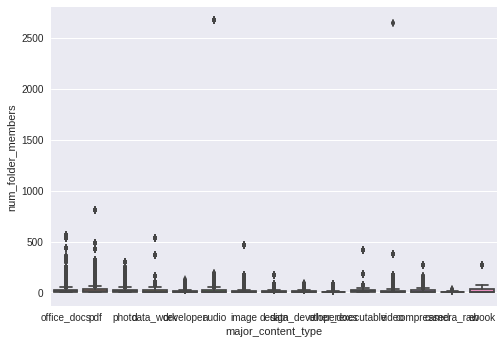

In [61]:
sns.boxplot(x="major_content_type", y="num_folder_members",  data=df)#, palette="PRGn")

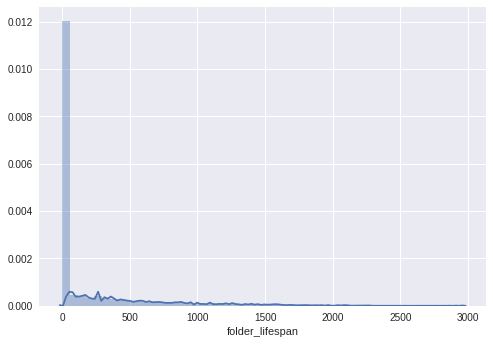

In [64]:
sns.distplot(df_selection["folder_lifespan"])#, bins=200)

In [ ]:
#sns.barplot(x="total_publications", y="num_external_collaborators", hue='is_business_user',data=df);
#sns.boxplot(x="total_publications", y="num_external_collaborators", data=df);
#sns.boxplot( hue='major_content_ext', data= df[["num_edits","num_adds","num_deletes"]]);

In [ ]:
print "types of files:\n" 
for item in sorted(list(df.major_content_type.unique())):
    print item, "   ",
    
    
print "\n\next of files:\n" 
for item in sorted(list(df.major_content_ext.unique())):
    print item,

In [65]:
print "number of files of each ext:"
df.groupby("major_content_ext").size().sort_values()

number of files of each ext:


major_content_ext
mrw           1
azw           1
fb2           1
tr            1
bz            1
hdb           1
pef           1
asp           1
srf           1
ebk           1
rm            2
hus           2
orf           2
mo            2
scss          2
swift         2
wps           2
dds           2
3ds           2
thm           3
dwf           3
azw3          3
scriv         4
max           4
prc           4
ava           4
tpz           4
pas           4
pct           4
nrw           4
          ...  
sav        3165
m4v        3247
wav        3536
ai         3594
gz         3633
rtf        3689
tiff       3903
gif        3912
r          4182
jpeg       4221
key        4353
m          6031
mp3        6870
log        6880
csv        9460
mov       11441
zip       14701
tex       16532
mp4       17499
txt       17641
tif       18497
png       34789
xls       53023
ppt       53191
doc      135559
pptx     138211
xlsx     139986
jpg      180928
docx     452259
pdf      550542
dtype:

In [ ]:
print "number of instances of each type being the majority in a folder:"
df.groupby("major_content_type").size().sort_values()

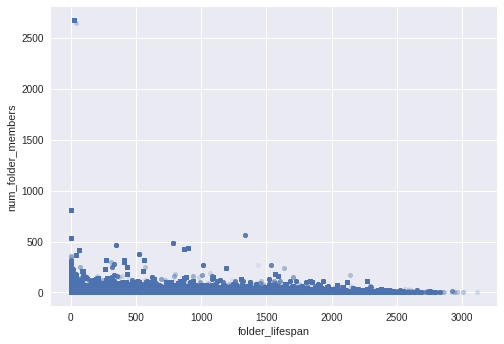

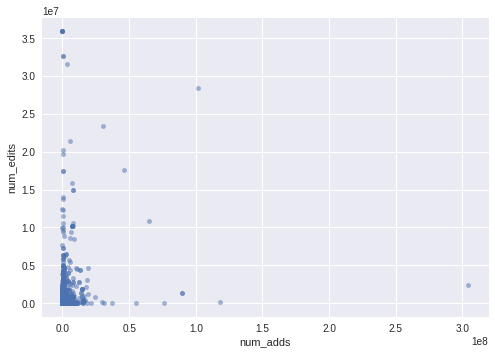

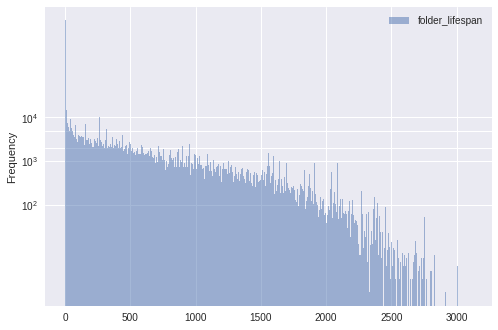

In [66]:
# instead of using matplotlib:
df.plot.scatter(x="folder_lifespan", y='num_folder_members', alpha=0.1)
#df.groupby('ranking30_University').num_external_collaborators.mean().plot(kind='bar')
df.plot.scatter(x="num_adds", y='num_edits', alpha=0.5)

df.plot.scatter(x="num_edits", y='folder_lifespan', alpha=0.1)

##### for printing out the histograms:    
Nbins=1000#quantiles
df[["folder_lifespan"]].plot.hist(bins=Nbins, alpha=0.5,logy=True,logx=False, cumulative=False,yticks=[100,1000,2000,5000,10000])
# fig = plt.gcf()
# fig.savefig(path_merge_linux.split("Merged_LinkedIn_WoS/")[0]+'hist_'+columna+"_"+str(Nbins)+'bins.png', dpi=600)
#####



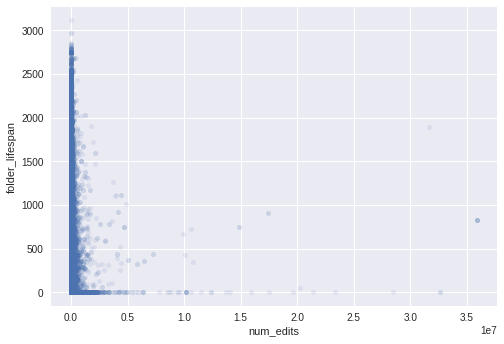

In [68]:

df.plot.scatter(x="num_edits", y='folder_lifespan', alpha=0.1)

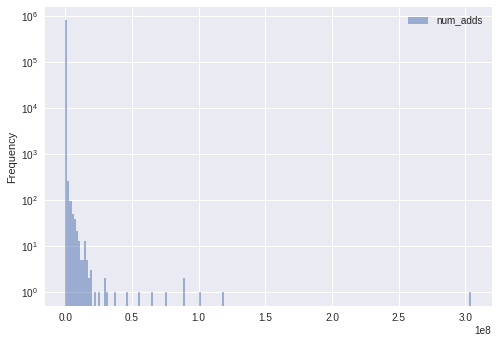

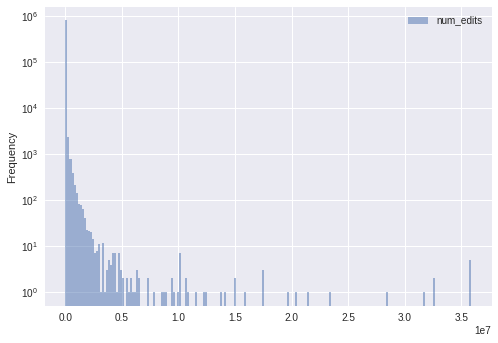

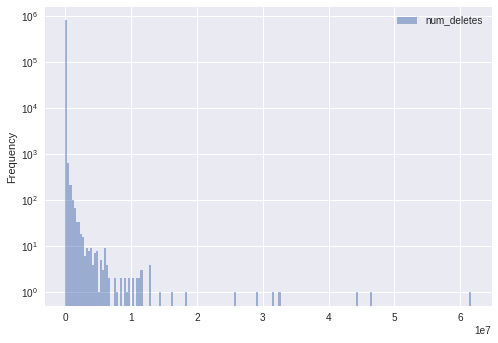

In [67]:

Nbins=200

df[["num_adds"]].plot.hist(bins=Nbins, alpha=0.5, logy=True, cumulative=False)#,yticks=[50000,100000,250000,500000,750000,1000000,100000000])

df[["num_edits"]].plot.hist(bins=Nbins, alpha=0.5, logy=True, cumulative=False)

df[["num_deletes"]].plot.hist(bins=Nbins, alpha=0.5, logy=True, cumulative=False)


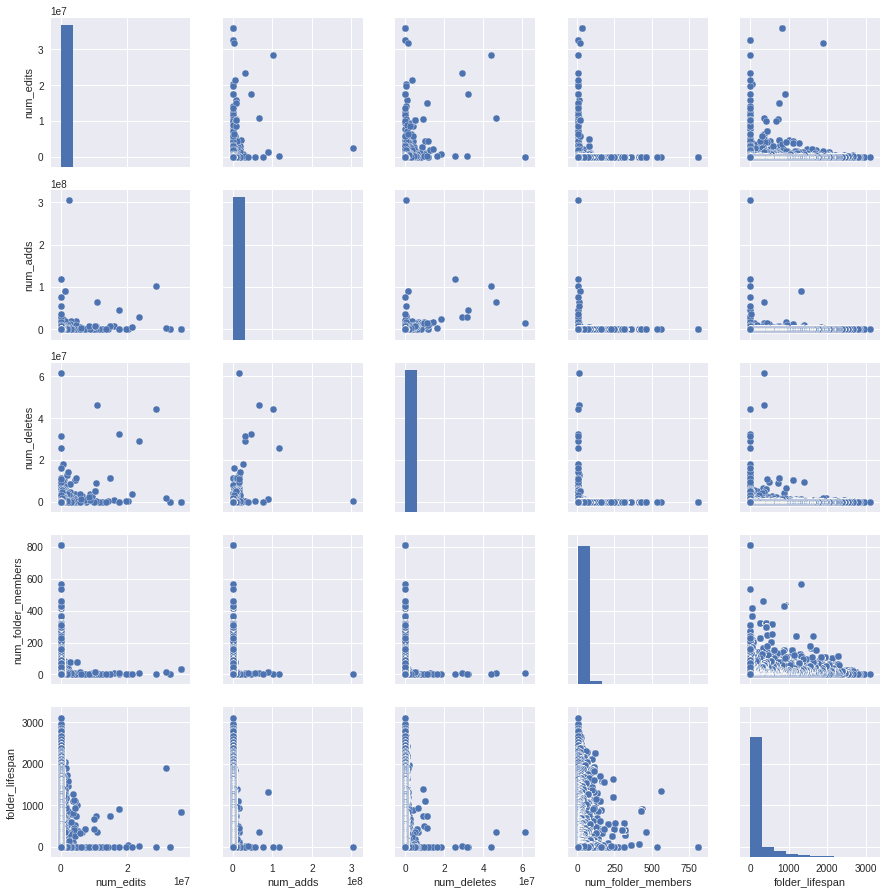

In [79]:

df_selection=df[df['num_edits'].notnull() & df['num_adds'].notnull()& df['num_deletes'].notnull()]  # because otherwise, the scatterplot doesnt work

sns.pairplot(df_selection[['num_edits','num_adds','num_deletes','num_folder_members','folder_lifespan']])  # pairwise scatter plots and distribution for each variable in the diagonal positions

In [ ]:
# # instead of using matplotlib:
# #df.plot.scatter(x="id", y='total_publications', alpha=0.1)
# #df.groupby('ranking30_University').num_external_collaborators.mean().plot(kind='bar')
# std = df.groupby('total_publications').num_external_collaborators.std()
# df.groupby('total_publications').num_external_collaborators.mean().plot(kind='bar',yerr=std)


In [ ]:
# use seaborn instead
# https://seaborn.pydata.org/tutorial/categorical.html

# sns.barplot(x="total_publications", y="num_external_collaborators", hue='is_business_user',data=df);
# sns.boxplot(x="total_publications", y="num_external_collaborators", data=df);
# sns.violinplot(x="total_publications", y="num_external_collaborators", hue='ranking30_University', data=df);

In [ ]:
# sns.jointplot(x="num_external_collaborators", y="num_internal_collaborators", data=df, kind="reg")
# # 
